In [11]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
#from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import requests
import scipy.stats as stats
import os
data1="/home/sistemas/m/octavo/stich/data"
data= "/home/sistemas/m/octavo/stich/data"
p2 = "/home/sistemas/m/octavo/stich/results"
#W=1

In [12]:
def get_sp100_tickets():
  url = "https://en.wikipedia.org/wiki/S%26P_100"#https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
  data = requests.get(url)
  sp100_tickets = pd.read_html(data.text)
  d = sp100_tickets[2]
  subset = d.select_dtypes(include='object').columns.tolist()
  d[subset] = d[subset].astype('string')
  return d
d = get_sp100_tickets()
subset = d.select_dtypes(include='object').columns.tolist()
d[subset] = d[subset].astype('string')
d.to_csv("/home/sistemas/m/octavo/stich/results/sp100tickets.csv")
#d = pd.read_csv(f"{data}/{W}/sp100pf.csv",skiprows=1 ,index_col=0, parse_dates=True)

/tmp/ipykernel_44424/417813973.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp100_tickets = pd.read_html(data.text)


In [104]:
d

,Symbol,Name,Sector
0,AAPL,Apple Inc.,Information Technology
1,ABBV,AbbVie,Health Care
2,ABT,Abbott Laboratories,Health Care
3,ACN,Accenture,Information Technology
4,ADBE,Adobe Inc.,Information Technology
...,...,...,...
96,V,Visa Inc.,Financials
97,VZ,Verizon,Communication Services
98,WFC,Wells Fargo,Financials
99,WMT,Walmart,Consumer Staples


In [32]:
len(fr)

2

In [61]:
portf_best[portf_best["tipo"]==1]["risk"].iloc[1], ret_sharps

(0.04992728008547592, 44.35269285031167)

IndexError: invalid index to scalar variable.

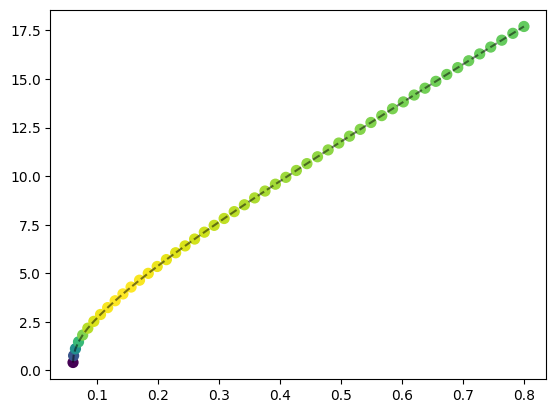

In [ ]:
for _ in range(len(fr)):
    #print(i)
    plt.scatter(fri[_], fr[_],c=fs[_],cmap="Greens_r",s=30) #Dibujamos los puntos de la frontera eficiente para cada periodo.
    plt.scatter(fri[_], fr[_], c=fs[_], cmap='viridis', s=50) #Dibujamos los puntos de la frontera eficiente para cada periodo, coloreados por el ratio de Sharpe.
    plt.plot(fri[_], fr[_], 'k--', alpha=0.5) #Dibujamos una línea que conecta todos los puntos de la frontera eficiente para cada periodo.
    #plt.colorbar(label='Sharpe Ratio') #Agregamos una barra de colores al gráfico, que indica el rango de los valores del ratio de Sharpe.
    # Marcamos portafolios clave
    #plt.scatter(vol_mins[_], portf_best[portf_best["tipo"]==0]["rexp"].iloc[_], marker='X', color='red', s=200, label='Minima Varianza' if _ == 0 else "")
    plt.scatter(vol_mins[_], ret_, marker='*', color='blue', s=300, label='Maxima Sharpe' if _ == 0 else "",)
    #plt.scatter(vol_mins[_], portf_best[portf_best["tipo"]==1]["rexp"].iloc[_], marker='X', color='red', s=200, label='Minima Varianza' if _ == 0 else "")
    
    break

plt.title(f'Frontera Eficiente de Markowitz - SP100 ({start_dates[0]} a {start_dates[-1]})')
plt.xlabel('Riesgo (Volatilidad Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.colorbar(label='Sharpe Ratio')
plt.legend() #Mostramos la leyenda del gráfico, que ayuda a identificar qué representan los puntos y las líneas
plt.grid(True) #Activamos la cuadrícula en el gráfico para facilitar la visualización de los valores.
plt.tight_layout() #Ajustamos el diseño del gráfico para que no se superpongan los elementos.
plt.show()

In [13]:

def get_data(ticker, start, end,W):
    #os.mkdir(f"/home/sistemas/m/octavo/stich/data/{W}")
    df = yf.download(ticker, start=start, end=end)
    df.to_csv(f"{data}/{ticker[1:]}{W}.csv")
    hist = yf.download(dd.Symbol.to_list(), start=start, end=end)
    hist.to_csv(f"{data}/sp100pf{W}.csv")

    """
    for ticket in d["Symbol"]:
        try:
            df = yf.download(ticket, start=start, end=end)
            df.to_csv(f"{data}/{W}/{ticket[1:]}{W}.csv")
        except Exception as e:
            print(f"Error downloading data for {ticket}: {e}")
            continue"""
#get_data("^OEX", "2020-01-01", "2021-12-31")


In [57]:
d = pd.read_csv(f"{data}/{W}/sp100pf.csv",skiprows=1 ,index_col=0, parse_dates=True)

/tmp/ipykernel_34537/329778855.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d = pd.read_csv(f"{data}/{W}/sp100pf.csv",skiprows=1 ,index_col=0, parse_dates=True)


In [8]:
/home/sistemas/m/octavo/stich/data/OEX2csv

NameError: name 'home' is not defined

ValueError: setting an array element with a sequence.

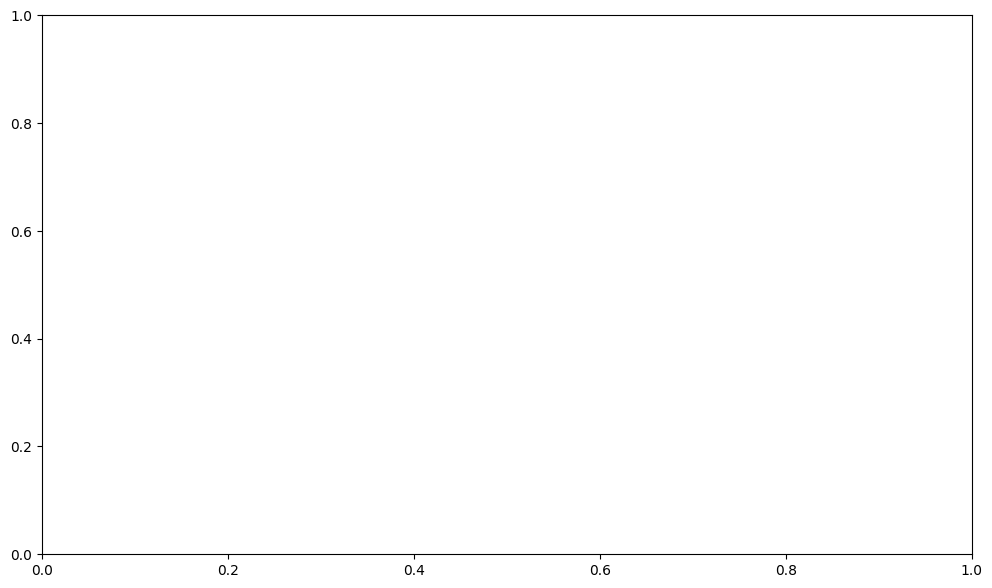

In [15]:
plt.figure(figsize=(12, 7)) #Definimos pulgadas (tamaño)
sc = plt.scatter(fri, fr, cmap='viridis', s=50) #creamos nuestro gráfico de dispersión (scatter plot)
plt.plot(fri, fr, 'k--', alpha=0.5) #Dibujamos una línea que conecta todos los puntos de la frontera eficiente
plt.colorbar(sc, label='Sharpe Ratio') #Agregamos una barra de colores al gráfico, que indica el rango de los valores del ratio de Sharpe.
# Marcamos portafolios clave
plt.scatter(vol_mins, portf_best[portf_best["tipo"]==0]["rexp"], marker='X', color='red', s=200, label='Minima Varianza')
plt.scatter(portf_best[portf_best["tipo"]==1]["risk"], ret_sharps, marker='*', color='blue', s=300, label='Maxima Sharpe')
plt.title('Frontera Eficiente de Markowitz - SP100')
plt.xlabel('Riesgo (Volatilidad Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.legend() #Mostramos la leyenda del gráfico, que ayuda a identificar qué representan los puntos y las líneas
plt.grid(True) #

In [58]:
print(d.columns)
d.isna().sum().sort_values(ascending=False)

Index(['BRK.B', 'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN',
       'AMT',
       ...
       'TXN.4', 'UNH.4', 'UNP.4', 'UPS.4', 'USB.4', 'V.4', 'VZ.4', 'WFC.4',
       'WMT.4', 'XOM.4'],
      dtype='object', length=506)


BRK.B      505
BRK.B.2    505
BRK.B.1    505
BRK.B.3    505
BRK.B.5    505
          ... 
MMM.1        1
META.1       1
MET.1        1
MDT.1        1
XOM.4        1
Length: 506, dtype: int64

In [ ]:

d = d.loc[:, ~d.columns.duplicated()]
d = d.dropna(axis=1, thresh=0.8 * len(d))  # Drop columns with more than 20% missing values
d = d.dropna(axis=0, thresh=0.8 * len(d.columns))  # Drop rows with more than 20% missing values
d = d.fillna(method='bfill')  # Forward fill to handle remaining NaNs
d = d.round(4)

/tmp/ipykernel_34537/3158586813.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d = d.fillna(method='bfill')  # Forward fill to handle remaining NaNs


In [60]:
"""os.chdir(f"/home/sistemas/m/octavo/stich/data/{W}")
content = os.listdir()
pwd = os.getcwd()
content
first_col = "SCO1"
complet_csv =pd.read_csv(f"{pwd}/{first_col}.csv",
               skiprows=3,
               names = ["date",first_col],
               parse_dates = [0],
               usecols=[0,1],
               converters={f"{first_col}":  lambda x : round(float(x),4) })
for ticket in content[1:]:
  xx = ticket
  col_namee = xx[:-4]
  a = pd.read_csv(f"{pwd}/{xx}",
               skiprows=3,
               names = [col_namee],
               parse_dates = [0],
               usecols=[1],
               converters={f"{col_namee}":  lambda x : round(float(x),4) })
  complet_csv[f"{col_namee}"] = a[col_namee]

d2 = pd.read_csv(f"{data}/OEX1.csv",
               skiprows=3,
               names = ["date","price"],
               parse_dates = [0],
               usecols=[0,1],
               converters={"price":  lambda x : round(float(x),4) })
d2.to_csv(f"{p2}/sp100-2.csv")

nu = complet_csv.isnull().sum().sort_values(ascending=False)
nu2 = nu[nu>1]
print(nu2.shape)
complet_csv = complet_csv.drop(columns=list(nu2.index))
complet_csv.to_csv(f"{data}/{W}/hist{W}.csv")

d1 = pd.read_csv(f"{data}/{W}/hist{W}.csv",parse_dates=["date"])
#d1.head(2)
d1.drop(columns=["Unnamed: 0"], inplace=True)
d1.set_index("date", inplace=True)"""

'os.chdir(f"/home/sistemas/m/octavo/stich/data/{W}")\ncontent = os.listdir()\npwd = os.getcwd()\ncontent\nfirst_col = "SCO1"\ncomplet_csv =pd.read_csv(f"{pwd}/{first_col}.csv",\n               skiprows=3,\n               names = ["date",first_col],\n               parse_dates = [0],\n               usecols=[0,1],\n               converters={f"{first_col}":  lambda x : round(float(x),4) })\nfor ticket in content[1:]:\n  xx = ticket\n  col_namee = xx[:-4]\n  a = pd.read_csv(f"{pwd}/{xx}",\n               skiprows=3,\n               names = [col_namee],\n               parse_dates = [0],\n               usecols=[1],\n               converters={f"{col_namee}":  lambda x : round(float(x),4) })\n  complet_csv[f"{col_namee}"] = a[col_namee]\n\nd2 = pd.read_csv(f"{data}/OEX1.csv",\n               skiprows=3,\n               names = ["date","price"],\n               parse_dates = [0],\n               usecols=[0,1],\n               converters={"price":  lambda x : round(float(x),4) })\nd2.to_csv

In [61]:
d2 = pd.read_csv(f"{data}/OEX{W}.csv",
               skiprows=3,
               names = ["date","price"],
               parse_dates = [0],
               usecols=[0,1],
               converters={"price":  lambda x : round(float(x),4) })

In [146]:
#d2 = pd.read_csv(f"{data}/OEX{W}.csv")
d2

,Price,Close,High,Low,Open,Volume
0,Ticker,^OEX,^OEX,^OEX,^OEX,^OEX
1,Date,667.1300048828125,686.4500122070312,662.5599975585938,686.4500122070312,1129400000
2,2001-01-02,667.1300048828125,686.4500122070312,662.5599975585938,686.4500122070312,1129400000
3,2001-01-03,703.969970703125,704.5900268554688,664.5599975585938,667.1300048828125,188070000
4,2001-01-04,700.9199829101562,709.6799926757812,698.5800170898438,703.969970703125,216940000
...,...,...,...,...,...,...
101,2001-05-24,668.2999877929688,668.739990234375,661.010009765625,665.1900024414062,1100700000
102,2001-05-25,658.2899780273438,668.2999877929688,657.489990234375,668.2999877929688,828100000
103,2001-05-29,652.9000244140625,659.6300048828125,651.9600219726562,658.2899780273438,1026000000
104,2001-05-30,642.9600219726562,652.9000244140625,641.8200073242188,652.9000244140625,1158600000


In [63]:
"""
plt.plot(d2["date"], d2["price"])
plt.title("S&P 100 Index Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()"""

'\nplt.plot(d2["date"], d2["price"])\nplt.title("S&P 100 Index Price")\nplt.xlabel("Date")\nplt.ylabel("Price")\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()'

In [64]:
d.describe()

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN.4,UNH.4,UNP.4,UPS.4,USB.4,V.4,VZ.4,WFC.4,WMT.4,XOM.4
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02
mean,115.202391,85.770593,100.512791,244.443182,487.992679,38.100451,83.227480,200.824494,221.622214,150.553222,...,4.707005e+06,3.500188e+06,3.135252e+06,3.813575e+06,7.188884e+06,9.243320e+06,1.748021e+07,3.499383e+07,2.609881e+07,2.642841e+07
std,29.047423,13.378337,15.159045,57.794444,101.605769,10.408952,27.013145,13.393289,21.586162,26.083053,...,2.127678e+06,1.923649e+06,1.435118e+06,2.375121e+06,3.683998e+06,4.323156e+06,6.854501e+06,1.637589e+07,1.359915e+07,1.104122e+07
min,54.378600,51.781900,57.252200,132.801900,285.000000,16.539100,38.710000,154.915800,155.810900,83.830500,...,1.044400e+06,1.284200e+06,6.917000e+05,1.006100e+06,1.980900e+06,3.223100e+06,5.763700e+06,1.190040e+07,9.054600e+06,8.039000e+06
25%,88.970425,74.270525,86.674725,199.942575,432.380000,27.796175,56.337500,191.599125,205.393850,144.370000,...,3.293850e+06,2.423450e+06,2.142975e+06,2.466500e+06,5.027800e+06,6.394775e+06,1.321710e+07,2.303100e+07,1.789635e+07,1.892388e+07
50%,120.808500,87.765850,102.063750,236.280050,480.940000,39.860200,82.235000,200.937200,219.192950,159.871250,...,4.270300e+06,2.962350e+06,2.780050e+06,3.095550e+06,6.232700e+06,8.173400e+06,1.570540e+07,3.126585e+07,2.171145e+07,2.350410e+07
75%,138.152800,96.170775,112.115525,283.603275,569.307500,46.680450,93.747500,212.083000,237.979550,167.748625,...,5.426625e+06,3.919025e+06,3.653725e+06,4.401050e+06,8.032500e+06,1.065418e+07,1.969358e+07,4.308892e+07,3.004455e+07,3.094502e+07
max,176.996700,119.083900,132.416700,393.405900,688.370000,56.441500,161.910000,226.450300,271.848200,186.570500,...,1.641390e+07,1.692890e+07,1.086990e+07,3.097090e+07,4.248460e+07,3.837960e+07,5.450110e+07,1.189526e+08,1.190187e+08,8.443940e+07


In [65]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 2020-01-02 to 2021-12-30
Columns: 495 entries, AAPL to XOM.4
dtypes: float64(495)
memory usage: 1.9+ MB


In [ ]:
mu = expected_returns.mean_historical_return(d, frequency=252)#ema_historical_return(d, frequency=252,compounding=True, span=180)
s = risk_models.sample_cov(d, frequency=252, span=180)
ef = EfficientFrontier(mu, s)
ef.min_volatility()
ret_min, vol_min, sharpe_min = ef.portfolio_performance()


In [67]:
ef.min_volatility()
ret_min, vol_min, sharpe_min = ef.portfolio_performance()

In [68]:
sharpe_min

1.1347119887726875

In [ ]:
print("Portafolio de Mínima Varianza")
print(f"Retorno Esperado: {ret_min:.2%}, Volatilidad: {vol_min:.2%}, Sharpe: {sharpe_min:.2f}")

# Constitución del portafolio (peso por acción)
#Limpiamos los pesos irrelevantes (cercanos a 0).
#Mostramos solo los activos que tienen peso en el portafolio óptimo.

df_weights = pd.DataFrame.from_dict(ef.clean_weights(), orient='index', columns=['Peso'])
df_weights.index.name = 'Activo'
df_weights = df_weights[df_weights['Peso'] > 0].sort_values('Peso', ascending=False)
display(df_weights)


Portafolio de Mínima Varianza
Retorno Esperado: 13.25%, Volatilidad: 11.67%, Sharpe: 1.13


,Peso
Activo,
VZ.1,0.27329
NFLX.1,0.09524
WMT.2,0.06881
CL.2,0.05795
MMM.1,0.05713
BMY.1,0.05347
DHR.1,0.04962
COST.1,0.03779
UPS.1,0.03455


In [70]:
ef_sharpe = EfficientFrontier(mu, s)
ef_sharpe.max_sharpe()
ret_sharpe, vol_sharpe, sharpe_sharpe = ef_sharpe.portfolio_performance()

#Imprimimos el resultado
print("Portafolio de Máxima Sharpe")
print(f"Retorno Esperado: {ret_sharpe:.2%}, Volatilidad: {vol_sharpe:.2%}, Sharpe: {sharpe_sharpe:.2f}")

#Mostramos los pesos significativos para el portafolio de máxima Sharpe.
#Limpiamos los pesos irrelevantes (cercanos a 0).
df_sharpe = pd.DataFrame.from_dict(ef_sharpe.clean_weights(), orient='index', columns=['Peso'])
df_sharpe.index.name = 'Activo'
df_sharpe = df_sharpe[df_sharpe['Peso'] > 0].sort_values('Peso', ascending=False)
display(df_sharpe)

Portafolio de Máxima Sharpe
Retorno Esperado: 116.56%, Volatilidad: 25.87%, Sharpe: 4.50


,Peso
Activo,
LLY.2,0.16478
COST.1,0.15162
UPS.1,0.12957
NVDA.1,0.12673
TSLA,0.11387
TSLA.2,0.06793
TSLA.1,0.06116
LLY.1,0.04974
TSLA.3,0.04887


# pre beta

In [ ]:
d2.isna().sum().sort_values(ascending=True)
d2 = d2.dropna(inplace=True)

date     0
price    3
dtype: int64

In [158]:
print(d.shape)
print(d2.shape)

(104, 405)
(504, 2)


In [170]:
d2.date

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
499   2021-12-23
500   2021-12-27
501   2021-12-28
502   2021-12-29
503   2021-12-30
Name: date, Length: 504, dtype: datetime64[ns]

In [166]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 2001-01-02 to 2001-05-31
Columns: 405 entries, AAPL to XOM.4
dtypes: float64(405)
memory usage: 333.9+ KB


In [168]:
d2.date.describe()

count                              504
mean     2020-12-31 12:34:17.142857216
min                2020-01-02 00:00:00
25%                2020-07-01 18:00:00
50%                2020-12-30 12:00:00
75%                2021-07-01 06:00:00
max                2021-12-30 00:00:00
Name: date, dtype: object

In [159]:
d2_filtrado = d2[d2['date'].isin(d.index)]

/tmp/ipykernel_34537/3160412872.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  d2_filtrado = d2[d2['date'].isin(d.index)]


In [164]:
d

,AAPL,ABT,ADBE,AIG,AMD,AMGN,AMT,AMZN,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CL,CMCSA,COF,COP,COST,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MCD,MDT,MET,MMM,MO,MRK,MS,MSFT,NEE,NKE,NVDA,ORCL,PEP,PFE,PG,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TXN,UNH,UNP,UPS,USB,VZ,WFC,WMT,XOM,AAPL.1,ABT.1,ADBE.1,AIG.1,AMD.1,AMGN.1,AMT.1,AMZN.1,AXP.1,BA.1,BAC.1,BK.1,BKNG.1,BLK.1,BMY.1,C.1,CAT.1,CL.1,CMCSA.1,COF.1,COP.1,COST.1,CSCO.1,CVS.1,CVX.1,DE.1,DHR.1,DIS.1,DUK.1,EMR.1,FDX.1,GD.1,GE.1,GILD.1,GS.1,HD.1,HON.1,IBM.1,INTC.1,INTU.1,ISRG.1,JNJ.1,JPM.1,KO.1,LIN.1,LLY.1,LMT.1,LOW.1,MCD.1,MDT.1,MET.1,MMM.1,MO.1,MRK.1,MS.1,MSFT.1,NEE.1,NKE.1,NVDA.1,ORCL.1,PEP.1,PFE.1,PG.1,QCOM.1,RTX.1,SBUX.1,SCHW.1,SO.1,SPG.1,T.1,TGT.1,TMO.1,TXN.1,UNH.1,UNP.1,UPS.1,USB.1,VZ.1,WFC.1,WMT.1,XOM.1,AAPL.2,ABT.2,ADBE.2,AIG.2,AMD.2,AMGN.2,AMT.2,AMZN.2,AXP.2,BA.2,BAC.2,BK.2,BKNG.2,BLK.2,BMY.2,C.2,CAT.2,CL.2,CMCSA.2,COF.2,COP.2,COST.2,CSCO.2,CVS.2,CVX.2,DE.2,DHR.2,DIS.2,DUK.2,EMR.2,FDX.2,GD.2,GE.2,GILD.2,GS.2,HD.2,HON.2,IBM.2,INTC.2,INTU.2,ISRG.2,JNJ.2,JPM.2,KO.2,LIN.2,LLY.2,LMT.2,LOW.2,MCD.2,MDT.2,MET.2,MMM.2,MO.2,MRK.2,MS.2,MSFT.2,NEE.2,NKE.2,NVDA.2,ORCL.2,PEP.2,PFE.2,PG.2,QCOM.2,RTX.2,SBUX.2,SCHW.2,SO.2,SPG.2,T.2,TGT.2,TMO.2,TXN.2,UNH.2,UNP.2,UPS.2,USB.2,VZ.2,WFC.2,WMT.2,XOM.2,AAPL.3,ABT.3,ADBE.3,AIG.3,AMD.3,AMGN.3,AMT.3,AMZN.3,AXP.3,BA.3,BAC.3,BK.3,BKNG.3,BLK.3,BMY.3,C.3,CAT.3,CL.3,CMCSA.3,COF.3,COP.3,COST.3,CSCO.3,CVS.3,CVX.3,DE.3,DHR.3,DIS.3,DUK.3,EMR.3,FDX.3,GD.3,GE.3,GILD.3,GS.3,HD.3,HON.3,IBM.3,INTC.3,INTU.3,ISRG.3,JNJ.3,JPM.3,KO.3,LIN.3,LLY.3,LMT.3,LOW.3,MCD.3,MDT.3,MET.3,MMM.3,MO.3,MRK.3,MS.3,MSFT.3,NEE.3,NKE.3,NVDA.3,ORCL.3,PEP.3,PFE.3,PG.3,QCOM.3,RTX.3,SBUX.3,SCHW.3,SO.3,SPG.3,T.3,TGT.3,TMO.3,TXN.3,UNH.3,UNP.3,UPS.3,USB.3,VZ.3,WFC.3,WMT.3,XOM.3,AAPL.4,ABT.4,ADBE.4,AIG.4,AMD.4,AMGN.4,AMT.4,AMZN.4,AXP.4,BA.4,BAC.4,BK.4,BKNG.4,BLK.4,BMY.4,C.4,CAT.4,CL.4,CMCSA.4,COF.4,COP.4,COST.4,CSCO.4,CVS.4,CVX.4,DE.4,DHR.4,DIS.4,DUK.4,EMR.4,FDX.4,GD.4,GE.4,GILD.4,GS.4,HD.4,HON.4,IBM.4,INTC.4,INTU.4,ISRG.4,JNJ.4,JPM.4,KO.4,LIN.4,LLY.4,LMT.4,LOW.4,MCD.4,MDT.4,MET.4,MMM.4,MO.4,MRK.4,MS.4,MSFT.4,NEE.4,NKE.4,NVDA.4,ORCL.4,PEP.4,PFE.4,PG.4,QCOM.4,RTX.4,SBUX.4,SCHW.4,SO.4,SPG.4,T.4,TGT.4,TMO.4,TXN.4,UNH.4,UNP.4,UPS.4,USB.4,VZ.4,WFC.4,WMT.4,XOM.4
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.2235,11.4919,23.2213,1162.4679,14.3750,43.4779,27.2115,0.6938,32.4243,40.5078,12.7410,32.8399,8.3462,24.2959,27.1565,270.1451,12.4858,18.2848,9.3210,45.2339,9.9735,27.5936,21.9322,18.6830,17.2053,13.9981,6.6538,21.4995,23.3607,19.4455,31.1400,22.5443,115.1353,1.6428,71.0838,27.0857,24.1934,42.6923,17.6682,16.0485,1.8125,26.6212,21.5709,15.2053,13.8368,46.3134,18.3417,7.9451,18.2178,37.8654,17.0674,25.2745,2.6185,36.2854,35.9331,13.2946,4.1042,5.1531,0.1144,21.2253,26.5784,17.6056,20.4348,22.3229,13.9865,3.9811,19.0204,6.4572,7.5854,7.1191,20.2054,23.6901,28.8804,11.6635,7.9016,28.5190,10.2730,13.8932,13.7404,11.5634,20.4247,0.2292,11.7307,29.0674,1179.7174,14.7500,45.9846,28.4314,0.8000,34.1001,42.6720,12.7410,33.3997,9.0881,25.8523,27.9161,277.5005,12.7386,18.8406,9.6273,47.1967,10.2685,27.8448,25.3475,19.5405,17.4055,14.2909,6.8727,21.8843,23.9253,20.1941,32.5829,23.4828,123.3593,1.8506,74.8064,27.5315,25.4236,44.0451,18.1304,17.2660,1.9132,27.3227,21.9692,15.4865,14.4192,48.0850,18.6913,8.0561,18.3878,38.7007,17.6321,25.7649,2.6362,37.1633,39.4517,13.7926,4.1481,5.2841,0.1278,23.9413,26.6457,17.8441,20.5324,25.9056,14.4512,4.1822,21.0273,6.5573,7.6634,7.1279,20.3953,24.2864,30.4394,12.3066,8.0187,29.5308,10.4401,13.9623,13.9633,11.8183,20.4820,0.2188,11.4621,22.2353,1150.4682,1

In [ ]:
d2_filtrado

(0, 2)

In [141]:
d.index

Index(['2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05', '2001-01-08',
       '2001-01-09', '2001-01-10', '2001-01-11', '2001-01-12', '2001-01-16',
       ...
       '2001-05-17', '2001-05-18', '2001-05-21', '2001-05-22', '2001-05-23',
       '2001-05-24', '2001-05-25', '2001-05-29', '2001-05-30', '2001-05-31'],
      dtype='object', name='Ticker', length=104)

In [72]:
rf = 0.0682  # Definimos la Tasa libre de riesgo anual
ret_max = mu.max() #mu es el vector de retornos esperados de los activos (calculados previamente). La función max() encuentra el valor máximo en el vector mu, es decir, el retorno máximo esperado entre todos los activos.
target_returns = np.linspace(ret_min, ret_max, 100) #Utiliza np.linspace() para crear un array de 100 valores entre ret_min (retorno mínimo) y ret_max (retorno máximo).

frontier_returns = [] # almacenará los retornos de cada portafolio en la frontera eficiente.
frontier_risks = [] #almacenará el riesgo (volatilidad) de cada portafolio.
frontier_sharpes = [] #almacenará el ratio de Sharpe de cada portafolio.
pesos_portafolios = [] #almacenará los pesos de los activos en cada portafolio.

for i, r in enumerate(target_returns): #Iniciamos un bucle que recorre los 100 valores de target_returns (los retornos objetivo) utilizando enumerate() para obtener tanto el índice i como el valor del retorno r en cada iteración.
    ef = EfficientFrontier(mu, s)
    try:
        ef.efficient_return(target_return=r, market_neutral=False) #Intenta calcular el portafolio más eficiente que tenga un retorno esperado cercano a r (el retorno objetivo de la frontera eficiente).
        ret, risk, _ = ef.portfolio_performance()
        sharpe = (ret - rf) / risk #Calculamos ratio sharpe
        weights = ef.clean_weights() #Obtenemos pesos

        frontier_returns.append(ret)
        frontier_risks.append(risk)
        frontier_sharpes.append(sharpe)
        pesos_portafolios.append(weights)
    except Exception as e: #Si ocurre cualquier error dentro del bloque try, se captura la excepción y se almacena en la variable e, pero el código continuará ejecutándose.
        continue  #

/home/sistemas/m/octavo/.venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [73]:
returns_assets = d.pct_change().dropna()
d2['price'] = d2['price'].pct_change().dropna()
returns_market = d2

In [74]:
returns_market
#returns_assets.rename(columns={"TIcker": "date"}, inplace=True)
#returns_assets.index =
returns_assets= returns_assets.reset_index().rename(columns={'Ticker': 'date'})

In [78]:
returns_assets["date"] = pd.to_datetime(returns_assets["date"])

In [79]:
combined = pd.merge(returns_assets, returns_market, on='date', how='inner') #Une los retornos de los activos (returns_assets) con los retornos del índice (returns_market) en un solo DataFrame.
returns_assets = combined.drop(columns=['price']) #significa que solo se conservarán las fechas comunes a ambos (activos e índice).
returns_market = combined['price']

In [127]:
returns_market

Series([], Name: price, dtype: float64)

In [82]:
betas = {} #Inicializamos un diccionario vacío llamado betas, que se utilizará para almacenar las betas de cada activo en el portafolio.

for asset in returns_assets.columns[1:]: # Iniciamos un bucle que recorre todas las columnas de asset_returns.
    # Realizamos regresión lineal de los rendimientos del activo vs el mercado
    print(asset)
    slope, _, _, _, _ = stats.linregress(returns_market, returns_assets[asset]) #Esta línea realiza una regresión lineal entre los rendimientos del mercado y los rendimientos del activo. La función linregress de la librería scipy.stats devuelve varios valores, pero solo estamos interesados en la pendiente de la regresión (es decir, la beta del activo), que es el primer valor de la salida.

    betas[asset] = slope #Guardamos la beta de cada activo en el diccionario betas, donde asset es la clave (nombre del activo) y slope es el valor (la beta calculada).

#Slope = pendiente = beta
#Los otros valores (_) son el intercepto, el valor de r (coeficiente de correlación), el valor de p (valor p) y el error estándar de la pendiente. Estos no nos interesan, por lo que los vamos a omitir con el guion bajo (_).


# Mostramos las betas de los activos
print("Betas de los activos con respecto al mercado:")
for asset, beta in betas.items(): #Iterar sobre todas las betas almacenadas en el diccionario para imprimirlas.
    print(f"{asset}: {beta:.4f}")

AAPL
ABBV
ABT
ACN
ADBE
AIG
AMD
AMGN
AMT
AMZN
AVGO
AXP
BA
BAC
BK
BKNG
BLK
BMY
C
CAT
CHTR
CL
CMCSA
COF
COP
COST
CRM
CSCO
CVS
CVX
DE
DHR
DIS
DUK
EMR
FDX
GD
GE
GILD
GM
GOOG
GOOGL
GS
HD
HON
IBM
INTC
INTU
ISRG
JNJ
JPM
KO
LIN
LLY
LMT
LOW
MA
MCD
MDLZ
MDT
MET
META
MMM
MO
MRK
MS
MSFT
NEE
NFLX
NKE
NOW
NVDA
ORCL
PEP
PFE
PG
PM
PYPL
QCOM
RTX
SBUX
SCHW
SO
SPG
T
TGT
TMO
TMUS
TSLA
TXN
UNH
UNP
UPS
USB
V
VZ
WFC
WMT
XOM
AAPL.1
ABBV.1
ABT.1
ACN.1
ADBE.1
AIG.1
AMD.1
AMGN.1
AMT.1
AMZN.1
AVGO.1
AXP.1
BA.1
BAC.1
BK.1
BKNG.1
BLK.1
BMY.1
C.1
CAT.1
CHTR.1
CL.1
CMCSA.1
COF.1
COP.1
COST.1
CRM.1
CSCO.1
CVS.1
CVX.1
DE.1
DHR.1
DIS.1
DUK.1
EMR.1
FDX.1
GD.1
GE.1
GILD.1
GM.1
GOOG.1
GOOGL.1
GS.1
HD.1
HON.1
IBM.1
INTC.1
INTU.1
ISRG.1
JNJ.1
JPM.1
KO.1
LIN.1
LLY.1
LMT.1
LOW.1
MA.1
MCD.1
MDLZ.1
MDT.1
MET.1
META.1
MMM.1
MO.1
MRK.1
MS.1
MSFT.1
NEE.1
NFLX.1
NKE.1
NOW.1
NVDA.1
ORCL.1
PEP.1
PFE.1
PG.1
PM.1
PYPL.1
QCOM.1
RTX.1
SBUX.1
SCHW.1
SO.1
SPG.1
T.1
TGT.1
TMO.1
TMUS.1
TSLA.1
TXN.1
UNH.1
UNP.1
UPS.1
USB.1
V.1
VZ.1
WFC.1
WMT.1


In [83]:
# 8. Calculamos las betas de los portafolios
portafolio_betas = []

for i in range(len(pesos_portafolios)):
    # Para cada portafolio, calculamos la beta ponderada
    beta_portafolio = sum(betas[asset] * pesos_portafolios[i].get(asset, 0) for asset in betas)
    portafolio_betas.append(beta_portafolio)

In [92]:
#tabla con métricas de cada portafolio.
df_frontera = pd.DataFrame({
    'Portafolio': [f"Portafolio {i+1}" for i in range(len(frontier_returns))],
    'Retorno Esperado': frontier_returns,
    'Riesgo (Volatilidad)': frontier_risks,
    'Sharpe Ratio': frontier_sharpes,
    'Beta': portafolio_betas
})

# Tabla de pesos de cada acción en cada portafolio.
df_pesos = pd.DataFrame(pesos_portafolios)
df_pesos.columns = d.columns

df_completo = pd.concat([df_frontera, df_pesos], axis=1) #Usamos pd.concat() para concatenar las tablas df_frontera y df_pesos a lo largo de las columnas

#axis=0: Se refiere a las filas. La operación se realiza a lo largo de las filas, lo que significa que se aplicará sobre cada columna.
#axis=1: Se refiere a las columnas. La operación se realiza a lo largo de las columnas, lo que significa que se aplicará sobre cada fila.

# Exportar a Excel
df_completo.to_csv(f"frontera1.csv", index=False)


# Mostrar tabla en pantalla
pd.set_option('display.max_columns', None)
#display(df_completo.head(5))

,Portafolio,Retorno Esperado,Riesgo (Volatilidad),Sharpe Ratio,Beta,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GM,GOOG,GOOGL,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,META,MMM,MO,MRK,MS,MSFT,NEE,NFLX,NKE,NOW,NVDA,ORCL,PEP,PFE,PG,PM,PYPL,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM,AAPL.1,ABBV.1,ABT.1,ACN.1,ADBE.1,AIG.1,AMD.1,AMGN.1,AMT.1,AMZN.1,AVGO.1,AXP.1,BA.1,BAC.1,BK.1,BKNG.1,BLK.1,BMY.1,C.1,CAT.1,CHTR.1,CL.1,CMCSA.1,COF.1,COP.1,COST.1,CRM.1,CSCO.1,CVS.1,CVX.1,DE.1,DHR.1,DIS.1,DUK.1,EMR.1,FDX.1,GD.1,GE.1,GILD.1,GM.1,GOOG.1,GOOGL.1,GS.1,HD.1,HON.1,IBM.1,INTC.1,INTU.1,ISRG.1,JNJ.1,JPM.1,KO.1,LIN.1,LLY.1,LMT.1,LOW.1,MA.1,MCD.1,MDLZ.1,MDT.1,MET.1,META.1,MMM.1,MO.1,MRK.1,MS.1,MSFT.1,NEE.1,NFLX.1,NKE.1,NOW.1,NVDA.1,ORCL.1,PEP.1,PFE.1,PG.1,PM.1,PYPL.1,QCOM.1,RTX.1,SBUX.1,SCHW.1,SO.1,SPG.1,T.1,TGT.1,TMO.1,TMUS.1,TSLA.1,TXN.1,UNH.1,UNP.1,UPS.1,USB.1,V.1,VZ.1,WFC.1,WMT.1,XOM.1,AAPL.2,ABBV.2,ABT.2,ACN.2,ADBE.2,AIG.2,AMD.2,AMGN.2,AMT.2,AMZN.2,AVGO.2,AXP.2,BA.2,BAC.2,BK.2,BKNG.2,BLK.2,BMY.2,C.2,CAT.2,CHTR.2,CL.2,CMCSA.2,COF.2,COP.2,COST.2,CRM.2,CSCO.2,CVS.2,CVX.2,DE.2,DHR.2,DIS.2,DUK.2,EMR.2,FDX.2,GD.2,GE.2,GILD.2,GM.2,GOOG.2,GOOGL.2,GS.2,HD.2,HON.2,IBM.2,INTC.2,INTU.2,ISRG.2,JNJ.2,JPM.2,KO.2,LIN.2,LLY.2,LMT.2,LOW.2,MA.2,MCD.2,MDLZ.2,MDT.2,MET.2,META.2,MMM.2,MO.2,MRK.2,MS.2,MSFT.2,NEE.2,NFLX.2,NKE.2,NOW.2,NVDA.2,ORCL.2,PEP.2,PFE.2,PG.2,PM.2,PYPL.2,QCOM.2,RTX.2,SBUX.2,SCHW.2,SO.2,SPG.2,T.2,TGT.2,TMO.2,TMUS.2,TSLA.2,TXN.2,UNH.2,UNP.2,UPS.2,USB.2,V.2,VZ.2,WFC.2,WMT.2,XOM.2,AAPL.3,ABBV.3,ABT.3,ACN.3,ADBE.3,AIG.3,AMD.3,AMGN.3,AMT.3,AMZN.3,AVGO.3,AXP.3,BA.3,BAC.3,BK.3,BKNG.3,BLK.3,BMY.3,C.3,CAT.3,CHTR.3,CL.3,CMCSA.3,COF.3,COP.3,COST.3,CRM.3,CSCO.3,CVS.3,CVX.3,DE.3,DHR.3,DIS.3,DUK.3,EMR.3,FDX.3,GD.3,GE.3,GILD.3,GM.3,GOOG.3,GOOGL.3,GS.3,HD.3,HON.3,IBM.3,INTC.3,INTU.3,ISRG.3,JNJ.3,JPM.3,KO.3,LIN.3,LLY.3,LMT.3,LOW.3,MA.3,MCD.3,MDLZ.3,MDT.3,MET.3,META.3,MMM.3,MO.3,MRK.3,MS.3,MSFT.3,NEE.3,NFLX.3,NKE.3,NOW.3,NVDA.3,ORCL.3,PEP.3,PFE.3,PG.3,PM.3,PYPL.3,QCOM.3,RTX.3,SBUX.3,SCHW.3,SO.3,SPG.3,T.3,TGT.3,TMO.3,TMUS.3,TSLA.3,TXN.3,UNH.3,UNP.3,UPS.3,USB.3,V.3,VZ.3,WFC.3,WMT.3,XOM.3,AAPL.4,ABBV.4,ABT.4,ACN.4,ADBE.4,AIG.4,AMD.4,AMGN.4,AMT.4,AMZN.4,AVGO.4,AXP.4,BA.4,BAC.4,BK.4,BKNG.4,BLK.4,BMY.4,C.4,CAT.4,CHTR.4,CL.4,CMCSA.4,COF.4,COP.4,COST.4,CRM.4,CSCO.4,CVS.4,CVX.4,DE.4,DHR.4,DIS.4,DUK.4,EMR.4,FDX.4,GD.4,GE.4,GILD.4,GM.4,GOOG.4,GOOGL.4,GS.4,HD.4,HON.4,IBM.4,INTC.4,INTU.4,ISRG.4,JNJ.4,JPM.4,KO.4,LIN.4,LLY.4,LMT.4,LOW.4,MA.4,MCD.4,MDLZ.4,MDT.4,MET.4,META.4,MMM.4,MO.4,MRK.4,MS.4,MSFT.4,NEE.4,NFLX.4,NKE.4,NOW.4,NVDA.4,ORCL.4,PEP.4,PFE.4,PG.4,PM.4,PYPL.4,QCOM.4,RTX.4,SBUX.4,SCHW.4,SO.4,SPG.4,T.4,TGT.4,TMO.4,TMUS.4,TSLA.4,TXN.4,UNH.4,UNP.4,UPS.4,USB.4,V.4,VZ.4,WFC.4,WMT.4,XOM.4
0,Portafolio 1,0.132476,0.116749,0.550552,0.245881,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00826,0.0,0.0,0.0,0.0,0.0,0.0,0.01069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01330,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03779,0.0,0.0,0.0,0.0,0.0,0.04962,0.0,0.0,0.0,0.0,0.0,0.0,0.01418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05713,0.0,0.02304,0.0,0.0,0.0,0.09524,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.03455,0.0,0.0,0.27329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00761,0.05795,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [88]:
df_completo

,Portafolio,Retorno Esperado,Riesgo (Volatilidad),Sharpe Ratio,Beta,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GM,GOOG,GOOGL,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,META,MMM,MO,MRK,MS,MSFT,NEE,NFLX,NKE,NOW,NVDA,ORCL,PEP,PFE,PG,PM,PYPL,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM,AAPL.1,ABBV.1,ABT.1,ACN.1,ADBE.1,AIG.1,AMD.1,AMGN.1,AMT.1,AMZN.1,AVGO.1,AXP.1,BA.1,BAC.1,BK.1,BKNG.1,BLK.1,BMY.1,C.1,CAT.1,CHTR.1,CL.1,CMCSA.1,COF.1,COP.1,COST.1,CRM.1,CSCO.1,CVS.1,CVX.1,DE.1,DHR.1,DIS.1,DUK.1,EMR.1,FDX.1,GD.1,GE.1,GILD.1,GM.1,GOOG.1,GOOGL.1,GS.1,HD.1,HON.1,IBM.1,INTC.1,INTU.1,ISRG.1,JNJ.1,JPM.1,KO.1,LIN.1,LLY.1,LMT.1,LOW.1,MA.1,MCD.1,MDLZ.1,MDT.1,MET.1,META.1,MMM.1,MO.1,MRK.1,MS.1,MSFT.1,NEE.1,NFLX.1,NKE.1,NOW.1,NVDA.1,ORCL.1,PEP.1,PFE.1,PG.1,PM.1,PYPL.1,QCOM.1,RTX.1,SBUX.1,SCHW.1,SO.1,SPG.1,T.1,TGT.1,TMO.1,TMUS.1,TSLA.1,TXN.1,UNH.1,UNP.1,UPS.1,USB.1,V.1,VZ.1,WFC.1,WMT.1,XOM.1,AAPL.2,ABBV.2,ABT.2,ACN.2,ADBE.2,AIG.2,AMD.2,AMGN.2,AMT.2,AMZN.2,AVGO.2,AXP.2,BA.2,BAC.2,BK.2,BKNG.2,BLK.2,BMY.2,C.2,CAT.2,CHTR.2,CL.2,CMCSA.2,COF.2,COP.2,COST.2,CRM.2,CSCO.2,CVS.2,CVX.2,DE.2,DHR.2,DIS.2,DUK.2,EMR.2,FDX.2,GD.2,GE.2,GILD.2,GM.2,GOOG.2,GOOGL.2,GS.2,HD.2,HON.2,IBM.2,INTC.2,INTU.2,ISRG.2,JNJ.2,JPM.2,KO.2,LIN.2,LLY.2,LMT.2,LOW.2,MA.2,MCD.2,MDLZ.2,MDT.2,MET.2,META.2,MMM.2,MO.2,MRK.2,MS.2,MSFT.2,NEE.2,NFLX.2,NKE.2,NOW.2,NVDA.2,ORCL.2,PEP.2,PFE.2,PG.2,PM.2,PYPL.2,QCOM.2,RTX.2,SBUX.2,SCHW.2,SO.2,SPG.2,T.2,TGT.2,TMO.2,TMUS.2,TSLA.2,TXN.2,UNH.2,UNP.2,UPS.2,USB.2,V.2,VZ.2,WFC.2,WMT.2,XOM.2,AAPL.3,ABBV.3,ABT.3,ACN.3,ADBE.3,AIG.3,AMD.3,AMGN.3,AMT.3,AMZN.3,AVGO.3,AXP.3,BA.3,BAC.3,BK.3,BKNG.3,BLK.3,BMY.3,C.3,CAT.3,CHTR.3,CL.3,CMCSA.3,COF.3,COP.3,COST.3,CRM.3,CSCO.3,CVS.3,CVX.3,DE.3,DHR.3,DIS.3,DUK.3,EMR.3,FDX.3,GD.3,GE.3,GILD.3,GM.3,GOOG.3,GOOGL.3,GS.3,HD.3,HON.3,IBM.3,INTC.3,INTU.3,ISRG.3,JNJ.3,JPM.3,KO.3,LIN.3,LLY.3,LMT.3,LOW.3,MA.3,MCD.3,MDLZ.3,MDT.3,MET.3,META.3,MMM.3,MO.3,MRK.3,MS.3,MSFT.3,NEE.3,NFLX.3,NKE.3,NOW.3,NVDA.3,ORCL.3,PEP.3,PFE.3,PG.3,PM.3,PYPL.3,QCOM.3,RTX.3,SBUX.3,SCHW.3,SO.3,SPG.3,T.3,TGT.3,TMO.3,TMUS.3,TSLA.3,TXN.3,UNH.3,UNP.3,UPS.3,USB.3,V.3,VZ.3,WFC.3,WMT.3,XOM.3,AAPL.4,ABBV.4,ABT.4,ACN.4,ADBE.4,AIG.4,AMD.4,AMGN.4,AMT.4,AMZN.4,AVGO.4,AXP.4,BA.4,BAC.4,BK.4,BKNG.4,BLK.4,BMY.4,C.4,CAT.4,CHTR.4,CL.4,CMCSA.4,COF.4,COP.4,COST.4,CRM.4,CSCO.4,CVS.4,CVX.4,DE.4,DHR.4,DIS.4,DUK.4,EMR.4,FDX.4,GD.4,GE.4,GILD.4,GM.4,GOOG.4,GOOGL.4,GS.4,HD.4,HON.4,IBM.4,INTC.4,INTU.4,ISRG.4,JNJ.4,JPM.4,KO.4,LIN.4,LLY.4,LMT.4,LOW.4,MA.4,MCD.4,MDLZ.4,MDT.4,MET.4,META.4,MMM.4,MO.4,MRK.4,MS.4,MSFT.4,NEE.4,NFLX.4,NKE.4,NOW.4,NVDA.4,ORCL.4,PEP.4,PFE.4,PG.4,PM.4,PYPL.4,QCOM.4,RTX.4,SBUX.4,SCHW.4,SO.4,SPG.4,T.4,TGT.4,TMO.4,TMUS.4,TSLA.4,TXN.4,UNH.4,UNP.4,UPS.4,USB.4,V.4,VZ.4,WFC.4,WMT.4,XOM.4
0,Portafolio 1,0.132476,0.116749,0.550552,0.245881,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00826,0.0,0.0,0.0,0.0,0.0,0.0,0.01069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01330,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03779,0.0,0.0,0.0,0.0,0.0,0.04962,0.0,0.0,0.0,0.0,0.0,0.0,0.01418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05713,0.0,0.02304,0.0,0.0,0.0,0.09524,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.03455,0.0,0.0,0.27329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00761,0.05795,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

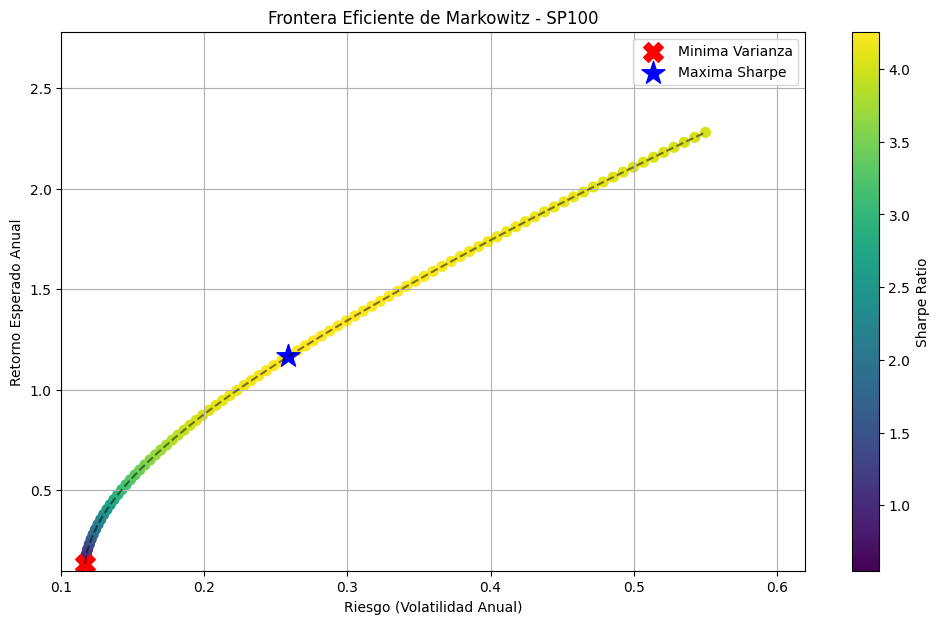

In [87]:
# 10. Graficamos frontera eficiente
plt.figure(figsize=(12, 7)) #Definimos pulgadas (tamaño)

sc = plt.scatter(frontier_risks, frontier_returns, c=frontier_sharpes, cmap='viridis', s=50) #creamos nuestro gráfico de dispersión (scatter plot)
plt.plot(frontier_risks, frontier_returns, 'k--', alpha=0.5) #Dibujamos una línea que conecta todos los puntos de la frontera eficiente
plt.colorbar(sc, label='Sharpe Ratio') #Agregamos una barra de colores al gráfico, que indica el rango de los valores del ratio de Sharpe.

# Marcamos portafolios clave
plt.scatter(vol_min, ret_min, marker='X', color='red', s=200, label='Minima Varianza')
plt.scatter(vol_sharpe, ret_sharpe, marker='*', color='blue', s=300, label='Maxima Sharpe')

plt.title('Frontera Eficiente de Markowitz - SP100')
plt.xlabel('Riesgo (Volatilidad Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.legend() #Mostramos la leyenda del gráfico, que ayuda a identificar qué representan los puntos y las líneas
plt.grid(True) #Activamos la cuadrícula en el gráfico para facilitar la visualización de los valores.
plt.xlim(0.1, .62)
plt.ylim(0.10, 2.78)
plt.show()

In [147]:
d2

,Price,Close,High,Low,Open,Volume
0,Ticker,^OEX,^OEX,^OEX,^OEX,^OEX
1,Date,667.1300048828125,686.4500122070312,662.5599975585938,686.4500122070312,1129400000
2,2001-01-02,667.1300048828125,686.4500122070312,662.5599975585938,686.4500122070312,1129400000
3,2001-01-03,703.969970703125,704.5900268554688,664.5599975585938,667.1300048828125,188070000
4,2001-01-04,700.9199829101562,709.6799926757812,698.5800170898438,703.969970703125,216940000
...,...,...,...,...,...,...
101,2001-05-24,668.2999877929688,668.739990234375,661.010009765625,665.1900024414062,1100700000
102,2001-05-25,658.2899780273438,668.2999877929688,657.489990234375,668.2999877929688,828100000
103,2001-05-29,652.9000244140625,659.6300048828125,651.9600219726562,658.2899780273438,1026000000
104,2001-05-30,642.9600219726562,652.9000244140625,641.8200073242188,652.9000244140625,1158600000


In [148]:
d2 = pd.read_csv(f"{data}/OEX{W}.csv",
               skiprows=3,
               names = ["date","price"],
               parse_dates = [0],
               usecols=[0,1],
               converters={"price":  lambda x : round(float(x),4) })
d2

,date,price
0,2020-01-02,1458.1300
1,2020-01-03,1446.4800
2,2020-01-06,1452.8101
3,2020-01-07,1447.3600
4,2020-01-08,1455.4900
...,...,...
499,2021-12-23,2183.2200
500,2021-12-27,2212.5701
501,2021-12-28,2209.0100
502,2021-12-29,2210.1001


In [ ]:
d2.isna().sum().sort_values(ascending=True)
drop

date     0
price    1
dtype: int64

In [ ]:
d2

In [67]:
start_dates = ["2001-01-01","2001-06-01","2002-01-01","2002-06-01",
        ]

dd = get_sp100_tickets()
subset = d.select_dtypes(include='object').columns.tolist()
dd[subset] = dd[subset].astype('string')
dd.to_csv("/home/sistemas/m/octavo/stich/results/sp100tickets.csv")
portf_best = pd.DataFrame(columns=["tipo", "rexp", "risk", "sharpe"])
fr = []
fri = []
fs = []
vol_mins = []
ret_sharps = []
vol_sharps = []
ret_mins = []
sharpe_mins = []
sharpe_sharps = []




for idx ,datess in enumerate(start_dates):
    # Convertimos las fechas a formato datetime
    start_date ,end_date= start_dates[idx], start_dates[idx+1] if idx < len(start_dates) - 1 else "2024-06-01"
    

    # Obtenemos los datos del índice S&P 100
    get_data("^OEX", start_date, end_date,idx)
    d = pd.read_csv(f"{data}/sp100pf{idx}.csv",skiprows=1 ,index_col=0, parse_dates=True)

    d = d.loc[:, ~d.columns.duplicated()]
    d = d.dropna(axis=1, thresh=0.8 * len(d))  # Drop columns with more than 20% missing values
    d = d.dropna(axis=0, thresh=0.8 * len(d.columns))  # Drop rows with more than 20% missing values
    d = d.fillna(method='bfill')  # Forward fill to handle remaining NaNs
    d = d.round(4)

    mu = expected_returns.mean_historical_return(d, frequency=252)
    s = risk_models.sample_cov(d, frequency=252, span=180)



    # Check for NaNs in mu or s
    if mu.isnull().any() or np.isnan(s.values).any():
        print(f"Skipping period {start_date} to {end_date} due to NaNs in mu or covariance matrix.")
        continue

    # Try min_volatility with fallback solvers
    try:
        ef = EfficientFrontier(mu, s)
        ef.min_volatility()
    except Exception as e:
        try:
            ef = EfficientFrontier(mu, s, solver="SCS")
            ef.min_volatility()
        except Exception as e2:
            print(f"Skipping min_volatility for period {start_date} to {end_date}: {e2}")
            ret_min, vol_min, sharpe_min = np.nan, np.nan, np.nan
        else:
            ret_min, vol_min, sharpe_min = ef.portfolio_performance()
    else:
        ret_min, vol_min, sharpe_min = ef.portfolio_performance()

    vol_mins.append(vol_min)
    ret_mins.append(ret_min)
    sharpe_mins.append(sharpe_min)

    nueva_fila = pd.DataFrame([{
        "tipo": 0,
        "rexp": ret_min,
        "risk": vol_min,
        "sharpe": sharpe_min
    }])
    portf_best = pd.concat([portf_best, nueva_fila], ignore_index=True)

    # Try max_sharpe with fallback solvers
    try:
        ef_sharpe = EfficientFrontier(mu, s)
        ef_sharpe.max_sharpe()
    except Exception as e:
        try:
            ef_sharpe = EfficientFrontier(mu, s, solver="SCS")
            ef_sharpe.max_sharpe()
        except Exception as e2:
            print(f"Skipping max_sharpe for period {start_date} to {end_date}: {e2}")
            ret_sharpe, vol_sharpe, sharpe_sharpe = np.nan, np.nan, np.nan
        else:
            ret_sharpe, vol_sharpe, sharpe_sharpe = ef_sharpe.portfolio_performance()
    else:
        ret_sharpe, vol_sharpe, sharpe_sharpe = ef_sharpe.portfolio_performance()
    ret_sharps.append(ret_sharpe)
    vol_sharps.append(vol_sharpe)
    sharpe_sharps.append(sharpe_sharpe)

    nueva_fila = pd.DataFrame([{
        "tipo": 1,
        "rexp": ret_sharpe,
        "risk": vol_sharpe,
        "sharpe": sharpe_sharpe
    }])
    portf_best = pd.concat([portf_best, nueva_fila], ignore_index=True)


    rf = 0.0682  # Definimos la Tasa libre de riesgo anual
    ret_max = mu.max() #mu es el vector de retornos esperados de los activos (calculados previamente). La función max() encuentra el valor máximo en el vector mu, es decir, el retorno máximo esperado entre todos los activos.
    target_returns = np.linspace(ret_min, ret_max, 100) #Utiliza np.linspace() para crear un array de 100 valores entre ret_min (retorno mínimo) y ret_max (retorno máximo).
    ret_sharps= mu.max() #mu es el vector de retornos esperados de los activos (calculados previamente). La función max() encuentra el valor máximo en el vector mu, es decir, el retorno máximo esperado entre todos los activos.
    frontier_returns = [] # almacenará los retornos de cada portafolio en la frontera eficiente.
    frontier_risks = [] #almacenará el riesgo (volatilidad) de cada portafolio.
    frontier_sharpes = [] #almacenará el ratio de Sharpe de cada portafolio.
    pesos_portafolios = [] #almacenará los pesos de los activos en cada portafolio.

    for i, r in enumerate(target_returns): #Iniciamos un bucle que recorre los 100 valores de target_returns (los retornos objetivo) utilizando enumerate() para obtener tanto el índice i como el valor del retorno r en cada iteración.
        ef = EfficientFrontier(mu, s)
        try:
            ef.efficient_return(target_return=r, market_neutral=False) #Intenta calcular el portafolio más eficiente que tenga un retorno esperado cercano a r (el retorno objetivo de la frontera eficiente).
            ret, risk, _ = ef.portfolio_performance()
            sharpe = (ret - rf) / risk #Calculamos ratio sharpe
            weights = ef.clean_weights() #Obtenemos pesos

            frontier_returns.append(ret)
            frontier_risks.append(risk)
            frontier_sharpes.append(sharpe)
            pesos_portafolios.append(weights)
        except Exception as e: #Si ocurre cualquier error dentro del bloque try, se captura la excepción y se almacena en la variable e, pero el código continuará ejecutándose.
            continue  

    fr.append(frontier_returns)
    fri.append(frontier_risks)
    fs.append(frontier_sharpes)
    
    
    # 7. Calculamos las betas de los activos y portafolios
    #Calculamos los retornos de los activos y del índice S&P 100

    #d2 = d2.dropna(inplace=True)
    d2 = pd.read_csv(f"{data}/OEX{idx}.csv",
               skiprows=3,
               names = ["date","price"],
               parse_dates = [0],
               usecols=[0,1],
               converters={"price":  lambda x : round(float(x),4) })
    #d2 = d2.fillna(method='bfill')
    d2= d2.dropna(axis=0, how='any') #Eliminamos filas con valores NaN en d2.

    #2.dropna(inplace=True) #Eliminamos filas con valores NaN en d2.
    d2 = d2[d2['date'].isin(d.index)] #Filtramos d2 para conservar solo las fechas que están presentes en d.

    returns_assets = d.pct_change().dropna()
    d2['price'] = d2['price'].pct_change().dropna()
    returns_market = d2
    returns_assets= returns_assets.reset_index().rename(columns={'Ticker': 'date'})
    returns_assets["date"] = pd.to_datetime(returns_assets["date"])
    combined = pd.merge(returns_assets, returns_market, on='date', how='inner') #Une los retornos de los activos (returns_assets) con los retornos del índice (returns_market) en un solo DataFrame.
    returns_assets = combined.drop(columns=['price']) #significa que solo se conservarán las fechas comunes a ambos (activos e índice).
    returns_market = combined['price']
    betas = {} #Inicializamos un diccionario vacío llamado betas, que se utilizará para almacenar las betas de cada activo en el portafolio.

    for asset in returns_assets.columns[1:]: # Iniciamos un bucle que recorre todas las columnas de asset_returns.
        # Realizamos regresión lineal de los rendimientos del activo vs el mercado
        print(asset)
        slope, _, _, _, _ = stats.linregress(returns_market, returns_assets[asset]) #Esta línea realiza una regresión lineal entre los rendimientos del mercado y los rendimientos del activo. La función linregress de la librería scipy.stats devuelve varios valores, pero solo estamos interesados en la pendiente de la regresión (es decir, la beta del activo), que es el primer valor de la salida.

        betas[asset] = slope #Guardamos la beta de cada activo en el diccionario betas, donde asset es la clave (nombre del activo) y slope es el valor (la beta calculada).
        portafolio_betas = []

    for i in range(len(pesos_portafolios)):
        # Para cada portafolio, calculamos la beta ponderada
        beta_portafolio = sum(betas[asset] * pesos_portafolios[i].get(asset, 0) for asset in betas)
        portafolio_betas.append(beta_portafolio)




    # tabla con métricas de cada portafolio
    df_frontera = pd.DataFrame({
    'Portafolio': [f"Portafolio {i+1}" for i in range(len(frontier_returns))],
    'Retorno Esperado': frontier_returns,
    'Riesgo (Volatilidad)': frontier_risks,
    'Sharpe Ratio': frontier_sharpes,
    'Beta': portafolio_betas
})

    # Tabla de pesos de cada acción en cada portafolio.
    df_pesos = pd.DataFrame(pesos_portafolios)
    df_pesos.columns = d.columns

    df_completo = pd.concat([df_frontera, df_pesos], axis=1) #Usamos pd.concat() para concatenar las tablas df_frontera y df_pesos a lo largo de las columnas

    #axis=0: Se refiere a las filas. La operación se realiza a lo largo de las filas, lo que significa que se aplicará sobre cada columna.
    #axis=1: Se refiere a las columnas. La operación se realiza a lo largo de las columnas, lo que significa que se aplicará sobre cada fila.

    # Exportar a Excel
    df_completo.to_csv(f"{data}/frontera{idx}.csv", index=False)
plt.figure(figsize=(12, 7)) #Definimos pulgadas (tamaño)
for _ in range(len(fr)):
    plt.scatter(fri[_], fr[_]) #Dibujamos los puntos de la frontera eficiente para cada periodo.
    plt.scatter(fri[_], fr[_], c=fs[_], cmap='viridis', s=50) #Dibujamos los puntos de la frontera eficiente para cada periodo, coloreados por el ratio de Sharpe.
    plt.plot(fri[_], fr[_], 'k--', alpha=0.5) #Dibujamos una línea que conecta todos los puntos de la frontera eficiente para cada periodo.
    plt.colorbar(label='Sharpe Ratio') #Agregamos una barra de colores al gráfico, que indica el rango de los valores del ratio de Sharpe.
    # Marcamos portafolios clave
    plt.scatter(vol_mins[_], portf_best[portf_best["tipo"]==0]["rexp"].iloc[_], marker='X', color='red', s=200, label='Minima Varianza' if _ == 0 else "")
    plt.scatter(portf_best[portf_best["tipo"]==1]["risk"].iloc[_], ret_sharps, marker='*', color='blue', s=300, label='Maxima Sharpe' if _ == 0 else "")
plt.title(f'Frontera Eficiente de Markowitz - SP100 ({start_dates[0]} a {start_dates[-1]})')
plt.xlabel('Riesgo (Volatilidad Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.legend() #Mostramos la leyenda del gráfico, que ayuda a identificar qué representan los puntos y las líneas
plt.grid(True) #Activamos la cuadrícula en el gráfico para facilitar la visualización de los valores.
plt.xlim(0.1, .62)
plt.ylim(0.10, 2.78)
plt.show()
plt.figure(figsize=(12, 7)) #Definimos pulgadas (tamaño)
sc = plt.scatter(fri, fr, cmap='viridis', s=50) #creamos nuestro gráfico de dispersión (scatter plot)
plt.plot(fri, fr, 'k--', alpha=0.5) #Dibujamos una línea que conecta todos los puntos de la frontera eficiente
plt.colorbar(sc, label='Sharpe Ratio') #Agregamos una barra de colores al gráfico, que indica el rango de los valores del ratio de Sharpe.
# Marcamos portafolios clave
plt.scatter(vol_mins, portf_best[portf_best["tipo"]==0]["rexp"], marker='X', color='red', s=200, label='Minima Varianza')
plt.scatter(portf_best[portf_best["tipo"]==1]["risk"], ret_sharps, marker='*', color='blue', s=300, label='Maxima Sharpe')
plt.title('Frontera Eficiente de Markowitz - SP100')
plt.xlabel('Riesgo (Volatilidad Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.legend() #Mostramos la leyenda del gráfico, que ayuda a identificar qué representan los puntos y las líneas
plt.grid(True) #Activamos la cuadrícula en el gráfico para facilitar la visualización de los valores.



/tmp/ipykernel_44424/417813973.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp100_tickets = pd.read_html(data.text)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  101 of 101 completed

20 Failed downloads:
['ACN', 'TMUS', 'CRM', 'GM', 'MA', 'PM', 'PYPL', 'CHTR', 'NOW', 'MDLZ', 'AVGO', 'NFLX', 'PLTR', 'ABBV', 'META', 'GOOGL', 'TSLA', 'GOOG', 'V']: YFPricesMissingError('possibly delisted; no price data found  (1d 2001-01-01 -> 2001-06-01) (Yahoo error = "Data doesn\'t exist for startDate = 978325200, endDate = 991368000")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipykernel_44424/3349077856.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, 

AAPL
ABT
ADBE
AIG
AMD
AMGN
AMT
AMZN
AXP
BA
BAC
BK
BKNG
BLK
BMY
C
CAT
CL
CMCSA
COF
COP
COST
CSCO
CVS
CVX
DE
DHR
DIS
DUK
EMR
FDX
GD
GE
GILD
GS
HD
HON
IBM
INTC
INTU
ISRG
JNJ
JPM
KO
LIN
LLY
LMT
LOW
MCD
MDT
MET
MMM
MO
MRK
MS
MSFT
NEE
NKE
NVDA
ORCL
PEP
PFE
PG
QCOM
RTX
SBUX
SCHW
SO
SPG
T
TGT
TMO
TXN
UNH
UNP
UPS
USB
VZ
WFC
WMT
XOM
AAPL.1
ABT.1
ADBE.1
AIG.1
AMD.1
AMGN.1
AMT.1
AMZN.1
AXP.1
BA.1
BAC.1
BK.1
BKNG.1
BLK.1
BMY.1
C.1
CAT.1
CL.1
CMCSA.1
COF.1
COP.1
COST.1
CSCO.1
CVS.1
CVX.1
DE.1
DHR.1
DIS.1
DUK.1
EMR.1
FDX.1
GD.1
GE.1
GILD.1
GS.1
HD.1
HON.1
IBM.1
INTC.1
INTU.1
ISRG.1
JNJ.1
JPM.1
KO.1
LIN.1
LLY.1
LMT.1
LOW.1
MCD.1
MDT.1
MET.1
MMM.1
MO.1
MRK.1
MS.1
MSFT.1
NEE.1
NKE.1
NVDA.1
ORCL.1
PEP.1
PFE.1
PG.1
QCOM.1
RTX.1
SBUX.1
SCHW.1
SO.1
SPG.1
T.1
TGT.1
TMO.1
TXN.1
UNH.1
UNP.1
UPS.1
USB.1
VZ.1
WFC.1
WMT.1
XOM.1
AAPL.2
ABT.2
ADBE.2
AIG.2
AMD.2
AMGN.2
AMT.2
AMZN.2
AXP.2
BA.2
BAC.2
BK.2
BKNG.2
BLK.2
BMY.2
C.2
CAT.2
CL.2
CMCSA.2
COF.2
COP.2
COST.2
CSCO.2
CVS.2
CVX.2
DE.2
DHR.2
DIS.2
DUK.2
EMR.2
FDX.2

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  100 of 101 completed

18 Failed downloads:
['TMUS', 'CRM', 'MA', 'PYPL', 'GM', 'CHTR', 'PM', 'NOW', 'NFLX', 'AVGO', 'ABBV', 'PLTR', 'META', 'TSLA', 'GOOGL', 'V', 'GOOG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2001-06-01 -> 2002-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 991368000, endDate = 1009861200")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipykernel_44424/3349077856.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d = pd.read_csv(f"{data}/sp100pf{idx}.csv",skiprows=1 ,index_col=0, parse_dates=True)
/tmp/ipykernel_44424/3349077856.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill(

Skipping period 2001-06-01 to 2002-01-01 due to NaNs in mu or covariance matrix.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  101 of 101 completed

17 Failed downloads:
['TMUS', 'CRM', 'MA', 'GM', 'PYPL', 'CHTR', 'PM', 'NOW', 'AVGO', 'PLTR', 'META', 'ABBV', 'GOOGL', 'TSLA', 'V', 'GOOG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2002-01-01 -> 2002-06-01) (Yahoo error = "Data doesn\'t exist for startDate = 1009861200, endDate = 1022904000")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipykernel_44424/3349077856.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d = pd.read_csv(f"{data}/sp100pf{idx}.csv",skiprows=1 ,index_col=0, parse_dates=True)
/tmp/ipykernel_44424/3349077856.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or ob

AttributeError: 'numpy.float64' object has no attribute 'append'